# Tarefa 3 - Visualização de Dados

## Importando Dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from concat_df import concat_df

sns.set(rc = {'figure.figsize':(16, 8)})
sns.set_palette('Set2')
df = concat_df()

df

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2.418000e+12,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
251877,2050722,0,2017-06-29 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,84,2017
251878,2050723,0,2017-07-06 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,72,2017
251879,2050724,0,2017-07-06 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,129,2017
251880,2050725,0,2017-08-10 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,24,2017


### Gráfico de Linha
Observação sobre média do valor dos recibos por ano

<AxesSubplot:xlabel='year', ylabel='receipt_value'>

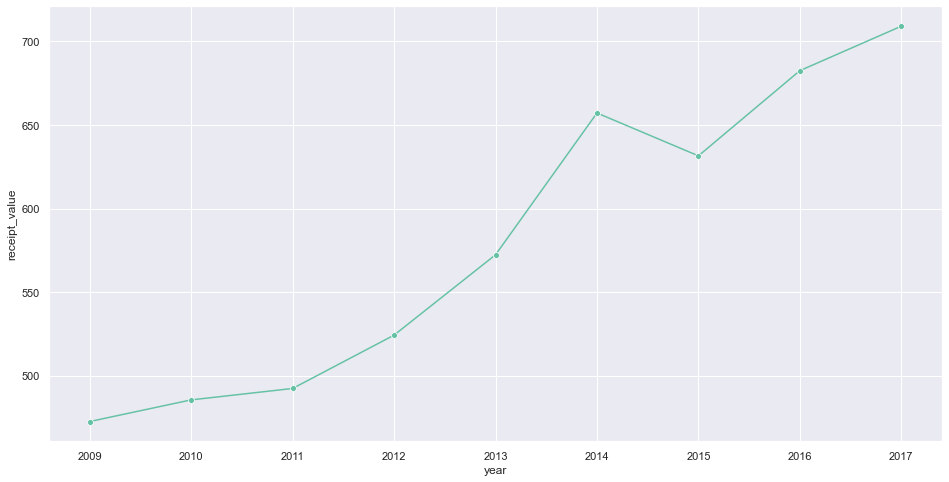

In [3]:
sns.lineplot(data=df, x="year", y="receipt_value", marker="o", ci=None)

A julgar pela observação da média dos valores dos recibos (informação trazida pelo gráfico) podemos ver uma tendência no aumento dos gastos com o passar dos anos, é possível concluir a influência da inflanção no aumento dos gastos a cada ano. [A inflação no período entre 2009 e 2017 foi de aproximadamente 65% segundo o Banco Central do Brasil](https://www3.bcb.gov.br/CALCIDADAO/publico/corrigirPorIndice.do?method=corrigirPorIndice), o que bate com a obserção gráfica.

A mudança de padrão no crescimento que ocorre de 2014 para 2015 é uma ocorrência que poderia ser estudada para melhor entendimento do que pode ter gerado o comportamento inesperado. Os anos de 2010, 2012, 2014 e 2016 foram anos eleitorais e pode-se observar o padrão de aumento dos gastos no ano posterior, mas que não acontece no caso de 2014 para 2015. Outra observação foi a presença da crise política e econômica que aconteceu no ano de 2015, apesar de que ainda seria necessário um estudo melhor para tirar conclusões mais confiáveis.

### Histograma
Observação sobre distribuição dos gastos totais dos deputados

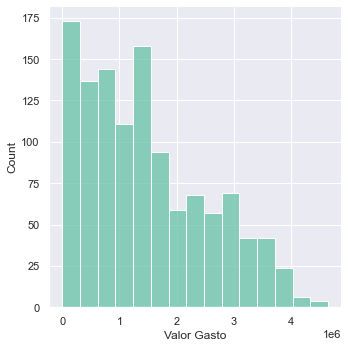

In [4]:
df_dep = df.groupby("deputy_id").sum()
df_dep["Valor Gasto"] = df_dep["receipt_value"]
sns.displot(df_dep, x="Valor Gasto")

O histograma anterior foi feito em cima dos dados levemente modificados para expor a quantidade de gastos por deputado. Com essa transformação e a visualização, podemos ver que uma quantidade pequena de deputados gastam muito mais do que o restante. Uma observação válida é a de que alguns deputados passam mais tempo do que outros em seus mandatos, isso faz com que naturalmente o gasto nesse caso seja maior.

### Gráfico de Barra
Observação sobre média do valor dos recibos por estado

<AxesSubplot:xlabel='state_code', ylabel='receipt_value'>

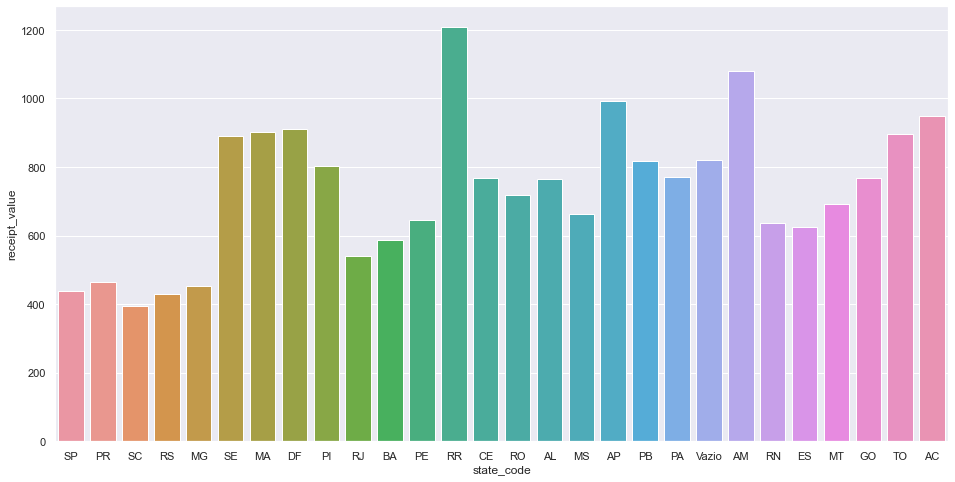

In [5]:
sns.barplot(data=df, x="state_code", y="receipt_value", ci=None)

<AxesSubplot:xlabel='state_code', ylabel='receipt_value'>

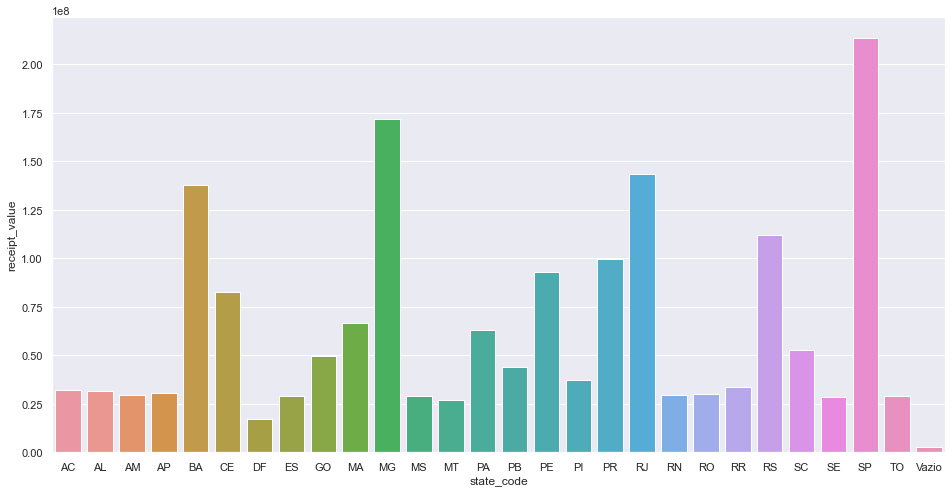

In [47]:
df_state = df.groupby("state_code").sum()
# df_state
# df_state.plot.pie(y="receipt_value", autopct='%1.0f%%')
sns.barplot(data=df_state, x=df_state.index, y="receipt_value", ci=None)

A avaliação do gráfico de barras anterior trás algumas observações interessantes com relação a média do valor dos recibos. Uma delas é a de que apesar de São Paulo ter a maior quantidade de deputados (por ser o estado mais populoso) ele não é o estado com maior média, posto ocupado por Roraima. De forma geral, os estados do Sul são os que possuem as menores médias, enquanto que Norte e Nordeste possuem valores mais altos.

Já observando o gráfico na perspectiva do valor total dos recibos para cada estado, a nova observação que surge é a de que São Paulo realmente possui o maior gasto em relação aos outros estados, assim como enxerga-se o aumento no gasto de estados com uma maior população e consequentemente uma maior quantidade de deputados. Sobre Roraima, podemos ver que apesar de ter a menor população do país, ele não é o estado com menores gastos. É interessante a observação de como Roraima tem um valor de gasto relativamente menor, mas possui uma média de gastos tão alta, podendo ser o alvo de maiores investigações para entender o motivo desse comportamento.

### Gráfico de dispersão

Pelo observado anteriormente, o estado com mais deputados, São Paulo, não é o estado que tem a maior média, e um dos estados com menor número de deputados, Roraima, possui a maior média, e como resultado não tem o maior valor somado de todos os gastos. Portanto, o gráfico de dispersão permite visualizar a relação entre [tamanho das bancadas dos estados](https://www2.camara.leg.br/a-camara/conheca/numero-de-deputados-por-estado) e os gastos.  

In [48]:
num_deputies_state = {'AC': 8, 'AL': 9, 'AM': 8, 'AP': 8, 'BA': 39,
                      'CE': 22, 'DF': 8, 'ES': 10, 'GO': 17, 'MA': 18,
                      'MG': 53, 'MS': 8, 'MT': 8, 'PA':17, 'PB':12,
                      'PE': 25, 'PI': 10, 'PR': 30, 'RJ': 46, 'RN': 8,
                      'RO': 8, 'RR': 8, 'RS': 31, 'SC': 16, 'SE': 8,
                      'SP': 70, 'TO': 8, 'Vazio': None
}

num_deputies_state_df = pd.DataFrame.from_dict(num_deputies_state, orient='index', columns = ['Número de Deputados'])

df_state = df_state.join(num_deputies_state_df)
df_state['Valor médio'] = df_state['receipt_value'] / df_state['Número de Deputados']

<AxesSubplot:xlabel='receipt_value', ylabel='Número de Deputados'>

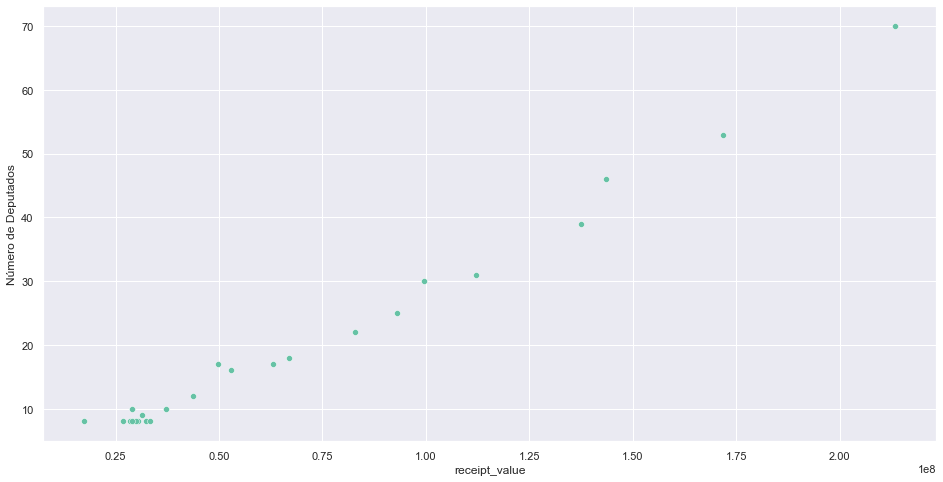

In [59]:
fig, ax = plt.subplots()

sns.scatterplot(data=df_state[df_state.index != 'Vazio'], x = "receipt_value", y = 'Número de Deputados', ax=ax)

Pelo gráfico de dispersão, aquilo que se espera se confirma, onde os estados com mais deputados gastam mais, o que chama a atenção é que no grupo de estados com 8 deputados, há uma variação considerável entre os gastos, com eles variando para abaixo de $R{$} 0.25 * 10^8$ até aproximadamente de $R{$} 0.375 * 10^8$, tirando esse grupo, o que se percebe visualmente é que o resto dos estados possuem uma correlação positiva entre o número de deputados e o total gasto.